# Calculating IOP coefficients with NOBM-OASIM dataset

This notebook demonstrates how coefficients of inherent optical properties (IOPs) were calculated using the NOBM-OASIM dataset and associated absorption and scattering properties found publically at https://gmao.gsfc.nasa.gov/reanalysis/MERRA-NOBM/data/data_description.php.

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Import NOBM-OASIM netcdf

In [2]:
nobm_oasim_xds = xr.open_dataset('/glusteruser/awindled/NOBM_OASIM_data_2020_cropped.nc', decode_times=False)
nobm_oasim_xds

<xarray.Dataset> Size: 1GB
Dimensions:     (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months      (months) float32 48B 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lat         (lat) float32 936B -84.0 -83.33 -82.67 ... 70.0 70.67 71.33
  * lon         (lon) float32 1kB -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength  (wavelength) int64 3kB 350 351 352 353 354 ... 747 748 749 750
Data variables: (12/19)
    tot         (months, lat, lon) float32 3MB ...
    chl         (months, lat, lon) float32 3MB ...
    dia         (months, lat, lon) float32 3MB ...
    coc         (months, lat, lon) float32 3MB ...
    cya         (months, lat, lon) float32 3MB ...
    din         (months, lat, lon) float32 3MB ...
    ...          ...
    cdc         (months, lat, lon) float32 3MB ...
    ice         (months, lat, lon) float32 3MB ...
    t           (months, lat, lon) float32 3MB ...
    s           (months, lat, lon) float32 3MB ...
    par         (months, lat, lon) float32 3MB ...
    rrs         (wavelength, months, lat, lon) float32 1GB ...

## 2. Import absorption and scattering properties for:
* water
* 6 phytoplankton groups
* particulate inorganic carbon
* detritus
* colored dissolved organic carbon (CDOC)
 
Data can be found here: https://gmao.gsfc.nasa.gov/reanalysis/MERRA-NOBM/data/data_description.php

TODO: ask Cecile why only PIC backscattering is on website and no detritus and CDOC

In [10]:
#sea water
abw = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/abw1.csv')
abw.replace(0.0, np.nan, inplace=True)
abw = abw[abw.wv > 349]
abw = abw[abw.wv < 751]

#chlorophytes
chl = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/chl1_6.csv')
chl.replace(0.0, np.nan, inplace=True)
chl = chl[chl.wv > 349]
chl = chl[chl.wv < 751]

#diatoms
dia = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/dia1_6.csv')
dia.replace(0.0, np.nan, inplace=True)
dia = dia[dia.wv > 349]
dia = dia[dia.wv < 751]

#cocclithophores
coc = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/coc1_6.csv')
coc.replace(0.0, np.nan, inplace=True)
coc = coc[coc.wv > 349]
coc = coc[coc.wv < 751]

#cyanobacteria
cya = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/cya1_6.csv')
cya.replace(0.0, np.nan, inplace=True)
cya = cya[cya.wv > 349]
cya = cya[cya.wv < 751]

#dinoflagellates
din = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/din1_6.csv')
din.replace(0.0, np.nan, inplace=True)
din = din[din.wv > 349]
din = din[din.wv < 751]

#phaeocystis
pha = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/pha1_6.csv')
pha.replace(0.0, np.nan, inplace=True)
pha = pha[pha.wv > 349]
pha = pha[pha.wv < 751]

#particulate inorganic carbon
pic = pd.read_csv('/glusteruser/awindled/OASIM_IOPs/pic_sigma1nm.csv')
pic.replace(0.0, np.nan, inplace=True)
#pic['b'] = pic.b*0.01
pic = pic[pic.wv > 349]
pic = pic[pic.wv < 751]

#detritus
Sd = 0.013
det = pd.DataFrame()
det['wv']= din.wv
det['a'] = np.exp(-Sd*(det.wv-443)) 
det['b'] = (555/det.wv)**0.5 

#CDOC
Scdoc = 0.014
cdoc = pd.DataFrame()
cdoc['wv']=din.wv
cdoc['a'] = np.exp(-Scdoc*(cdoc.wv-443)) 


## 3. Plot absorption, scattering, and backscattering

Backscattering-to-total scattering ratio values to calculate backscattering found in ___.

TODO: put legends on right hand side 1 column

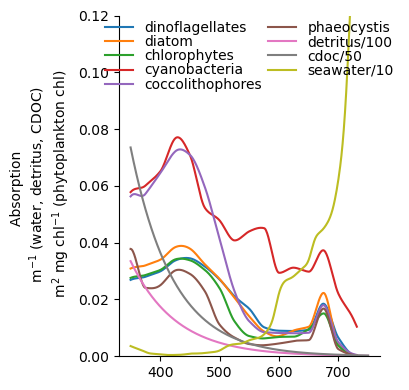

In [11]:
fig = plt.figure(figsize=(4,4))
ax = plt.subplot()

plt.plot(din.wv, din.a)
plt.plot(dia.wv, dia.a)
plt.plot(chl.wv, chl.a)
plt.plot(cya.wv, cya.a)
plt.plot(coc.wv, coc.a)
plt.plot(pha.wv, pha.a)
plt.plot(det.wv, det.a/100)
plt.plot(cdoc.wv, cdoc.a/50)
plt.plot(abw.wv, abw.a/10)

plt.legend(['dinoflagellates', 'diatom', 'chlorophytes', 'cyanobacteria', 'coccolithophores', 'phaeocystis', 'detritus/100', 'cdoc/50', 'seawater/10'], 
           ncol=2, labelspacing=0.01, frameon=False,loc="upper center", columnspacing=0.5, borderaxespad=0)

plt.ylabel('Absorption \n m$^{-1}$ (water, detritus, CDOC) \n m$^{2}$ mg chl$^{-1}$ (phytoplankton chl)')
ax.set_ylim(0,0.12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

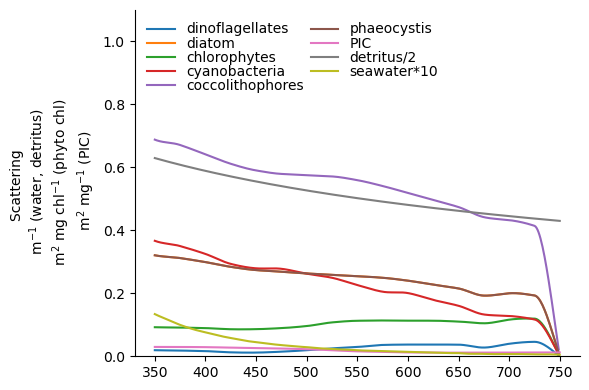

In [12]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot()

plt.plot(din.wv, din.b)
plt.plot(dia.wv, dia.b)
plt.plot(chl.wv, chl.b)
plt.plot(cya.wv, cya.b)
plt.plot(coc.wv, coc.b)
plt.plot(pha.wv, pha.b)
plt.plot(pic.wv, pic.b)
plt.plot(det.wv, det.b/2)
plt.plot(abw.wv, abw.b*10)

plt.legend(['dinoflagellates', 'diatom', 'chlorophytes', 'cyanobacteria', 'coccolithophores', 'phaeocystis', 'PIC', 'detritus/2', 'seawater*10'],
           ncol=2, labelspacing=0.01, frameon=False,loc="upper left", columnspacing=0.5)

ax.set_ylim(0,1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Scattering \n m$^{-1}$ (water, detritus) \n m$^{2}$ mg chl$^{-1}$ (phyto chl) \n m$^{2}$ mg$^{-1}$ (PIC)')
fig.tight_layout()

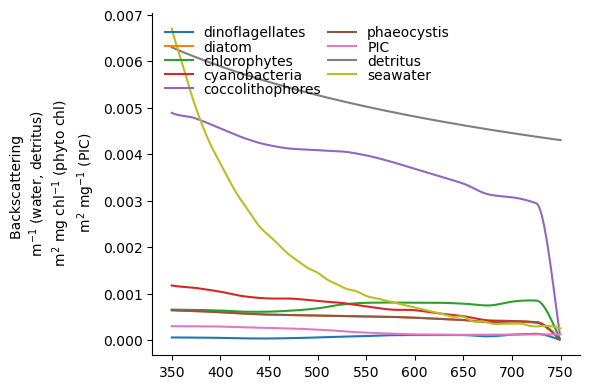

In [13]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot()

plt.plot(din.wv, din.b * 0.0029)
plt.plot(dia.wv, dia.b * 0.002)
plt.plot(chl.wv, chl.b * 0.0071)
plt.plot(cya.wv, cya.b * 0.0032)
plt.plot(coc.wv, coc.b * 0.0071)
plt.plot(pha.wv, pha.b * 0.002)
plt.plot(pic.wv, pic.b * 0.01)
plt.plot(det.wv, det.b * 0.005)
plt.plot(abw.wv, abw.b * 0.5)

plt.legend(['dinoflagellates', 'diatom', 'chlorophytes', 'cyanobacteria', 'coccolithophores', 'phaeocystis', 'PIC', 'detritus', 'seawater'],
           ncol=2, labelspacing=0.01, frameon=False,loc="upper left", columnspacing=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('Backscattering \n m$^{-1}$ (water, detritus) \n m$^{2}$ mg chl$^{-1}$ (phyto chl) \n m$^{2}$ mg$^{-1}$ (PIC)')

fig.tight_layout()

## 4. Calculate IOP coefficients and add as new variables

Set wavelength values

In [14]:
wavelength = np.arange(350,751,1)

Make water a and b table and xarray dataset

In [15]:
abw = abw.rename(columns={'wv':'wavelength'})
abw = abw.set_index('wavelength')
abw = abw.to_xarray()

Calculate absorption and backscattering coefficients and save as arrays

* phytoplankton absorption: <br>
(1/m) = conc (mg/m3) * chl specific absorption (m2/mg chl)

* phytoplankton backscattering: <br>
(1/m) = conc (mg/m3) * chl specific scattering (m2/mg chl) * backscattering-to-total scattering ratio
    


In [16]:
dia_a_array = []
dia_bb_array = []
din_a_array = []
din_bb_array = []
chl_a_array = []
chl_bb_array = []
cya_a_array = []
cya_bb_array = []
coc_a_array = []
coc_bb_array = []
pha_a_array = []
pha_bb_array = []
det_a_array = []
det_bb_array = []
cdoc_a_array = []
pic_bb_array = [] 

for i in range(len(wavelength)):
    dia_a = nobm_oasim_xds.dia * dia.a.iloc[i] 
    dia_a_array.append(dia_a)
    din_a = nobm_oasim_xds.din * din.a.iloc[i] 
    din_a_array.append(din_a)
    chl_a = nobm_oasim_xds.chl * chl.a.iloc[i]
    chl_a_array.append(chl_a)
    cya_a = nobm_oasim_xds.cya * cya.a.iloc[i] 
    cya_a_array.append(cya_a)
    coc_a = nobm_oasim_xds.coc * coc.a.iloc[i] 
    coc_a_array.append(coc_a)
    pha_a = nobm_oasim_xds.pha * pha.a.iloc[i] 
    pha_a_array.append(pha_a)

    dia_bb = nobm_oasim_xds.dia * dia.b.iloc[i] * 0.002
    dia_bb_array.append(dia_bb)
    din_bb = nobm_oasim_xds.din * din.b.iloc[i] * 0.0029
    din_bb_array.append(din_bb)
    chl_bb = nobm_oasim_xds.chl * chl.b.iloc[i] * 0.0071
    chl_bb_array.append(chl_bb)
    cya_bb = nobm_oasim_xds.cya * cya.b.iloc[i] * 0.0032
    cya_bb_array.append(cya_bb)
    coc_bb = nobm_oasim_xds.coc * coc.b.iloc[i] * 0.0071
    coc_bb_array.append(coc_bb)
    pha_bb = nobm_oasim_xds.pha * pha.b.iloc[i] * 0.002
    pha_bb_array.append(pha_bb)
    
    det_a = nobm_oasim_xds.dtc * 8.0E-5 * det.a.iloc[i]
    det_a_array.append(det_a)
    
    det_bb = nobm_oasim_xds.dtc * 0.00115 * det.b.iloc[i] * 0.005
    det_bb_array.append(det_bb)
    
    cdoc_a = nobm_oasim_xds.cdc * 12 * 2.98E-4 * cdoc.a.iloc[i] 
    cdoc_a_array.append(cdoc_a)
    
    pic_bb = nobm_oasim_xds.pic * pic.b.iloc[i] * 0.01
    pic_bb_array.append(pic_bb)

Concatanate arrays to create xarray data arrays and add names

In [17]:
dia_a = xr.concat(dia_a_array, dim='wavelength')
dia_a = dia_a.rename('dia_a')
din_a = xr.concat(din_a_array, dim='wavelength')
din_a = din_a.rename('din_a')
chl_a = xr.concat(chl_a_array, dim='wavelength')
chl_a = chl_a.rename('chl_a')
cya_a = xr.concat(cya_a_array, dim='wavelength')
cya_a = cya_a.rename('cya_a')
coc_a = xr.concat(coc_a_array, dim='wavelength')
coc_a = coc_a.rename('coc_a')
pha_a = xr.concat(pha_a_array, dim='wavelength')
pha_a = pha_a.rename('pha_a')

dia_bb = xr.concat(dia_bb_array, dim='wavelength')
dia_bb = dia_bb.rename('dia_bb')
din_bb = xr.concat(din_bb_array, dim='wavelength')
din_bb = din_bb.rename('din_bb')
chl_bb = xr.concat(chl_bb_array, dim='wavelength')
chl_bb = chl_bb.rename('chl_bb')
cya_bb = xr.concat(cya_bb_array, dim='wavelength')
cya_bb = cya_bb.rename('cya_bb')
coc_bb = xr.concat(coc_bb_array, dim='wavelength')
coc_bb = coc_bb.rename('coc_bb')
pha_bb = xr.concat(pha_bb_array, dim='wavelength')
pha_bb = pha_bb.rename('pha_bb')

det_a = xr.concat(det_a_array, dim='wavelength')
det_a = det_a.rename('det_a')
det_bb = xr.concat(det_bb_array, dim='wavelength')
det_bb = det_bb.rename('det_bb')

cdoc_a = xr.concat(cdoc_a_array, dim='wavelength')
cdoc_a = cdoc_a.rename('cdoc_a')

pic_bb = xr.concat(pic_bb_array, dim='wavelength')
pic_bb = pic_bb.rename('pic_bb')

Add IOP coefficients to calculate total aph, ap, a, bbph, bbp, bb

In [18]:
total_phy_a = dia_a + din_a + chl_a + cya_a + coc_a + pha_a
total_phy_a = total_phy_a.rename('total_phy_a')
total_phy_bb = dia_bb + din_bb + chl_bb + cya_bb + coc_bb + pha_bb
total_phy_bb = total_phy_bb.rename('total_phy_bb')

particulate_a = total_phy_a + cdoc_a + det_a
particulate_a = particulate_a.rename('particulate_a')

particulate_bb = total_phy_bb + pic_bb + det_bb
particulate_bb = particulate_bb.rename('particulate_bb')

total_a = dia_a + din_a + chl_a + cya_a + coc_a + pha_a + det_a + cdoc_a 
total_a = total_a.rename('total_a')

total_bb = dia_bb + din_bb + chl_bb + cya_bb + coc_bb + pha_bb + det_bb + pic_bb 
total_bb = total_bb.rename('total_bb')

#add pure water 
total_a_array = []
total_bb_array = []

for i in range(len(wavelength)):
    a = total_a[i,:,:,:] + abw.a[i]
    total_a_array.append(a)
    
    bb = total_bb[i,:,:,:] + abw.b[i]*0.5 #b to bb 
    total_bb_array.append(bb)

total_a = xr.concat(total_a_array, dim='wavelength')
total_a = total_a.rename('total_a')

total_bb = xr.concat(total_bb_array, dim='wavelength')
total_bb = total_bb.rename('total_bb')

# 5. Merge all IOP coefficient data arrays together with NOBM-OASIM netcdf 

In [19]:
nobm_oasim_iops_xds = xr.merge((nobm_oasim_xds, total_a, total_bb, particulate_a, particulate_bb, total_phy_a, 
                total_phy_bb, dia_a, dia_bb, din_a, din_bb, chl_a, chl_bb, cya_a, cya_bb, 
                pha_a, pha_bb, coc_a, coc_bb, cdoc_a, det_a, det_bb, pic_bb))
nobm_oasim_iops_xds

<xarray.Dataset> Size: 32GB
Dimensions:         (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months          (months) float32 48B 0.0 1.0 2.0 3.0 ... 8.0 9.0 10.0 11.0
  * lat             (lat) float32 936B -84.0 -83.33 -82.67 ... 70.0 70.67 71.33
  * lon             (lon) float32 1kB -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength      (wavelength) int64 3kB 350 351 352 353 ... 747 748 749 750
Data variables: (12/41)
    tot             (months, lat, lon) float32 3MB ...
    chl             (months, lat, lon) float32 3MB nan nan nan ... nan nan nan
    dia             (months, lat, lon) float32 3MB nan nan nan ... nan nan nan
    coc             (months, lat, lon) float32 3MB nan nan nan ... nan nan nan
    cya             (months, lat, lon) float32 3MB nan nan nan ... nan nan nan
    din             (months, lat, lon) float32 3MB nan nan nan ... nan nan nan
    ...              ...
    coc_a           (wavelength, months, lat, lon) float32 1GB nan nan ... nan
    coc_bb          (wavelength, months, lat, lon) float32 1GB nan nan ... nan
    cdoc_a          (wavelength, months, lat, lon) float32 1GB nan nan ... nan
    det_a           (wavelength, months, lat, lon) float32 1GB nan nan ... nan
    det_bb          (wavelength, months, lat, lon) float32 1GB nan nan ... nan
    pic_bb          (wavelength, months, lat, lon) float32 1GB nan nan ... nan